___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [57]:
df.head(15)

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.rename(columns={"Annual Income (k$)":"Annual_Income",
                  "Spending Score (1-100)":"Spending_Score"}, inplace=True)

In [6]:
df.head(15)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe() # there is no outlier seems

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.shape

(200, 5)

In [5]:
# since customerID shows only indexes then we do not need it

df.drop(columns="CustomerID", inplace=True)

In [11]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [13]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





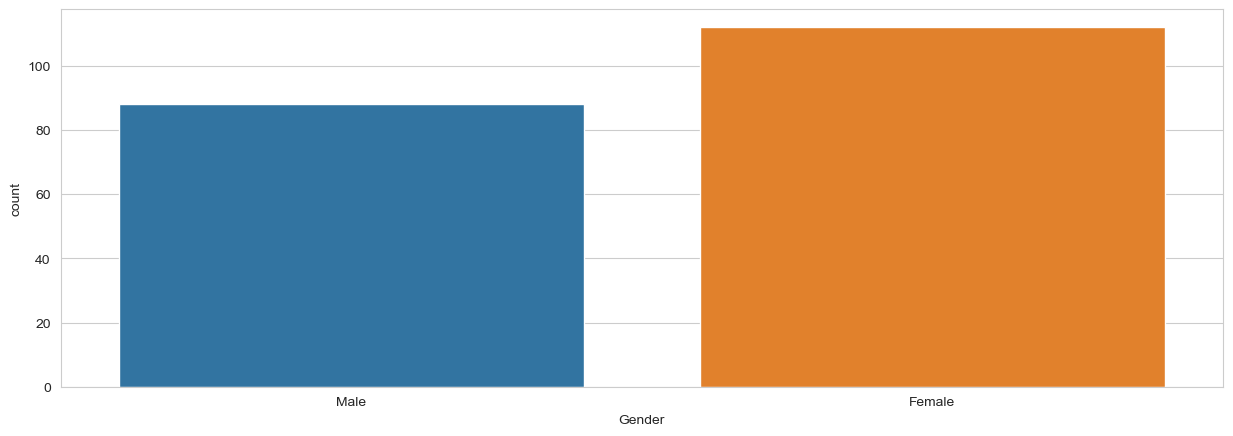

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Gender);

<b>As can be seen in the chart below, the customer group between the ages of 27-35 made up the majority of the customers.</b>

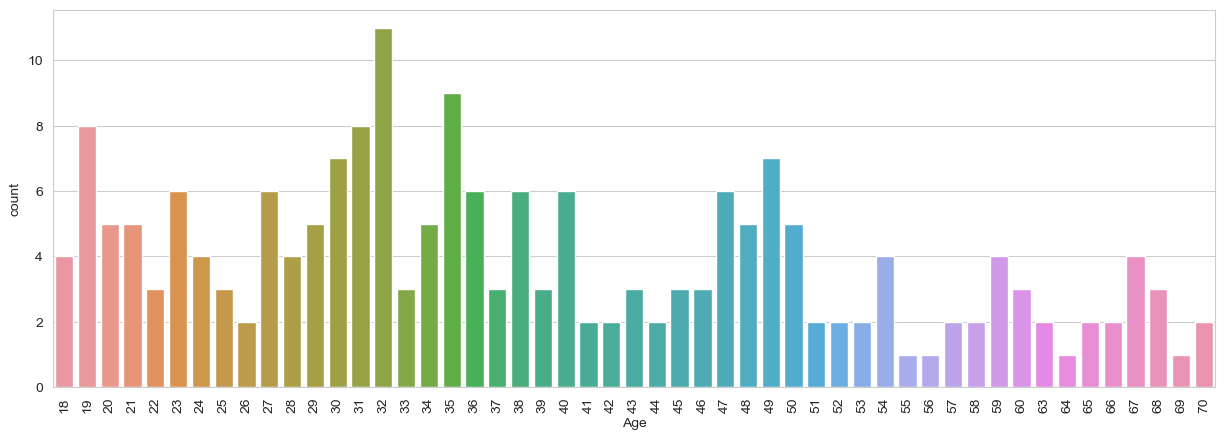

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Age)

plt.xticks(rotation=90);

<b>The annual revenues of the customers are mostly between 54 thousand dollars and 78 thousand dollars. So, we can say that the store appeals to a middle-income audience.</b>

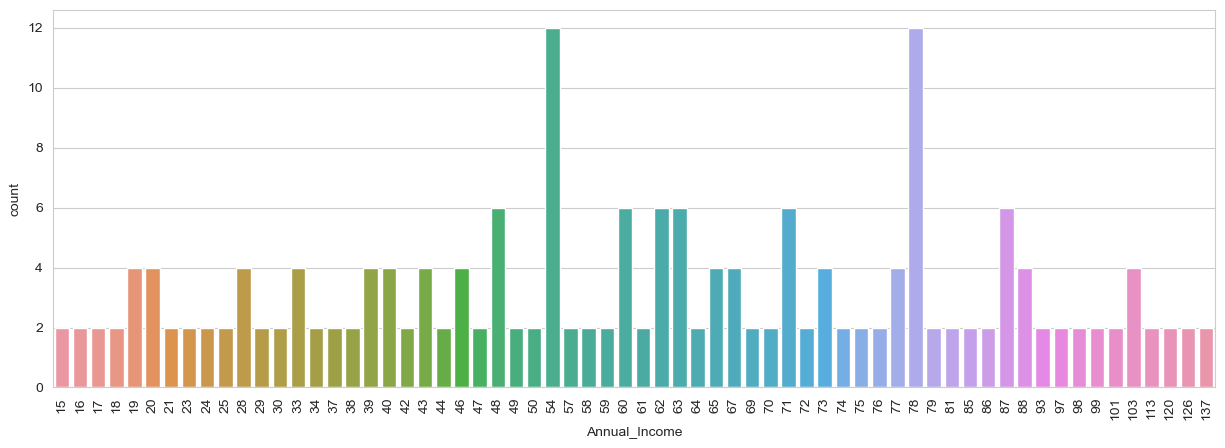

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Annual_Income)

plt.xticks(rotation=90);

<b>Spending score is concentrated between 35-60. We can say that another graphic showing that customers are included in the middle segment.</b>

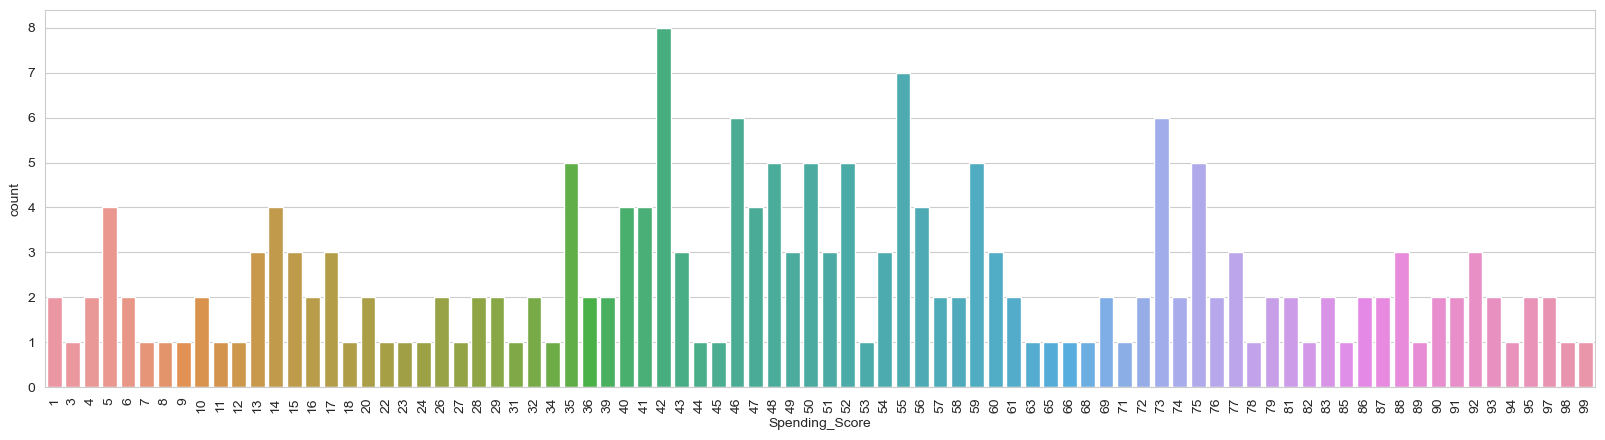

In [34]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.Spending_Score)

plt.xticks(rotation=90);

In [35]:
df.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


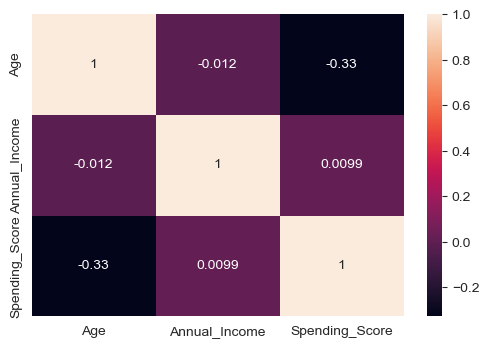

In [37]:
sns.heatmap(df.corr(), annot=True);

<b>For both sexes, we can say that the annual income is concentrated around 75k.</b>

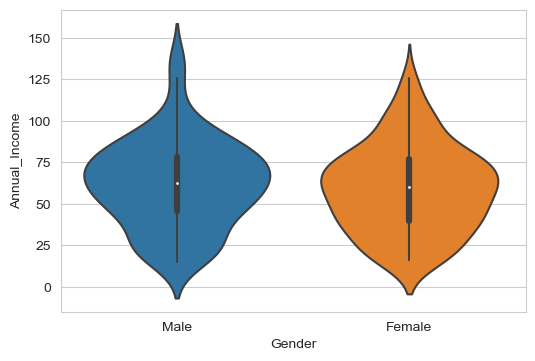

In [39]:
sns.violinplot(x=df.Gender,y=df.Annual_Income);

<b>We can say that the spending score is concentrated around 50k for both genders.</b>

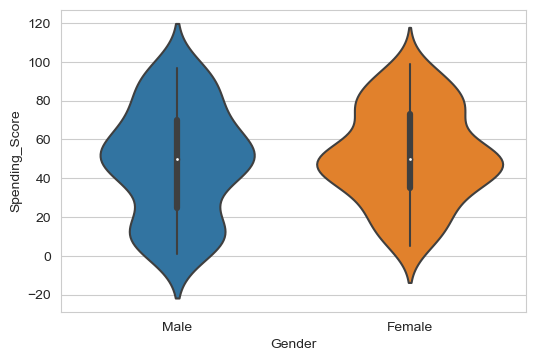

In [40]:
sns.violinplot(x=df.Gender,y=df.Spending_Score);

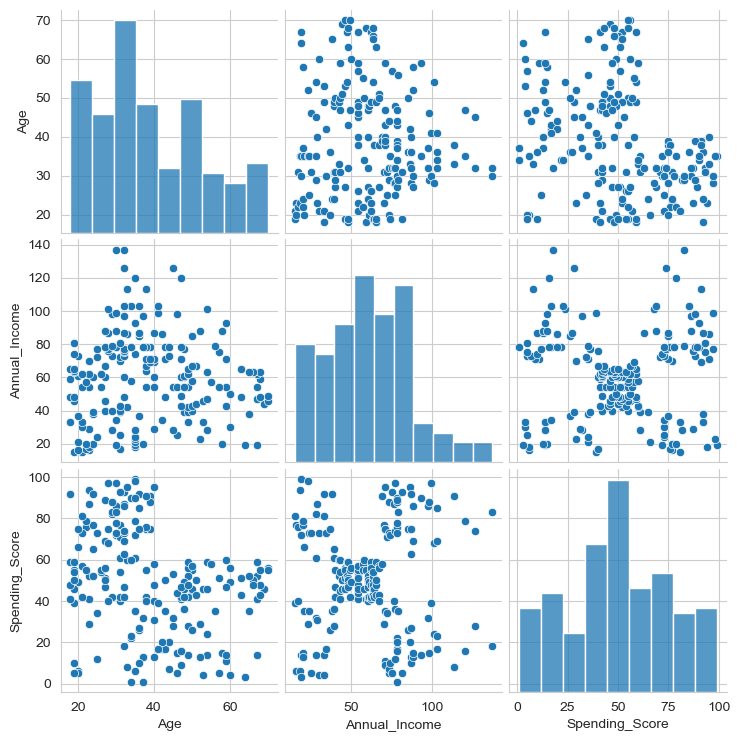

In [42]:
sns.pairplot(df);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [61]:
!pip install --user pyclustertend

In [65]:
 pip install --user numba --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pyclustertend import hopkins

In [7]:
df_1 = df.drop(columns="Gender") 

<b> Since Hopkin's score under 0.5 then we can make cluster analysis</b>

In [8]:
hopkins(df_1, df_1.shape[0])

0.3111812951189433

In [9]:
X1 = df.loc[:,["Age","Spending_Score"]]
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [10]:
hopkins(X1, X1.shape[0])

0.30263031015367087

#### *ii. Determine optimal number of clusters*

In [11]:
from sklearn.cluster import KMeans

In [44]:
df_1.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


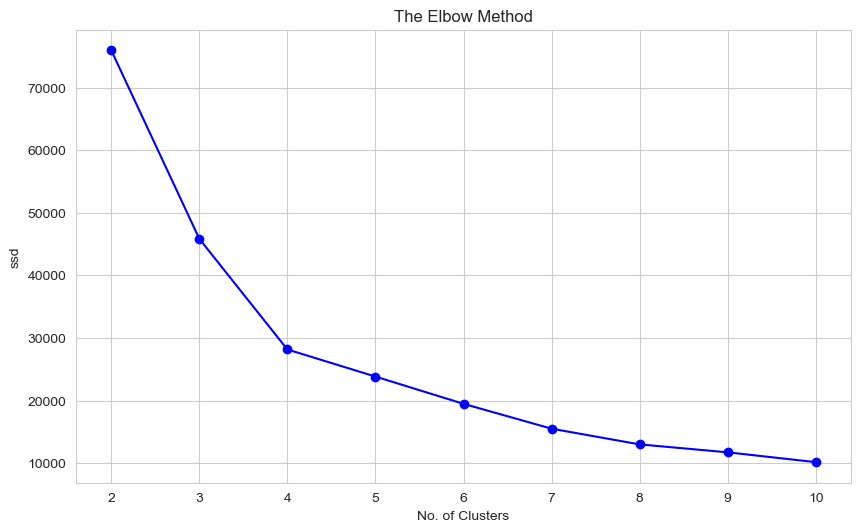

In [12]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [13]:
ssd

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23838.248821646197,
 19483.1179104427,
 15514.193134351033,
 13006.483628851032,
 11738.02029695451,
 10173.03947811448]

In [14]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
8    -1564.980819
dtype: float64

In [15]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


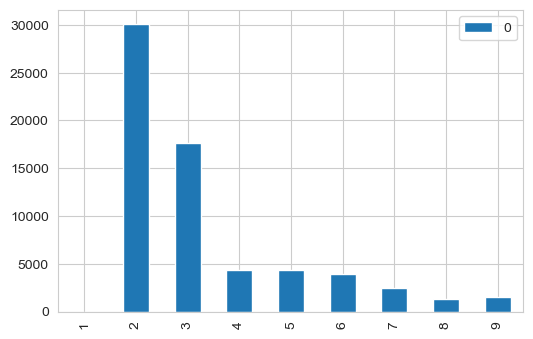

In [16]:
df_diff.plot(kind='bar');

<b>According to Elbow, Yellowbrick, and Silhouette Score, n_clusters=4 should be chosen as the point where the sharp decline stops.</b>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

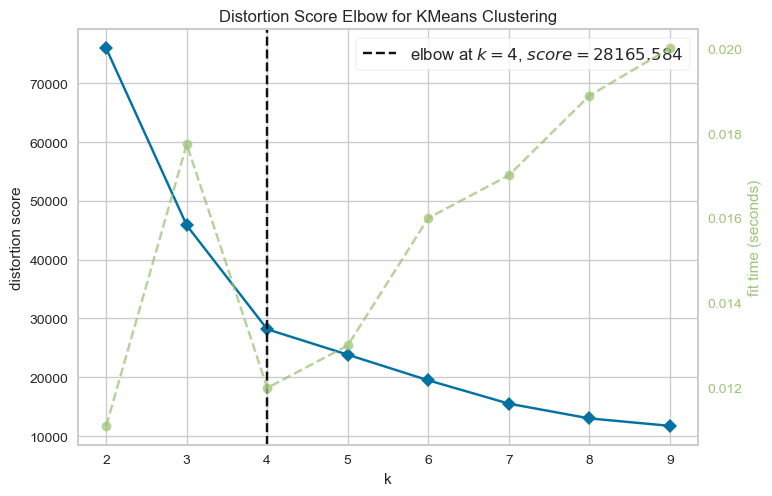

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

<b>When we look at the distribution between clusters, we can say that all clusters are of the same quality.</b>

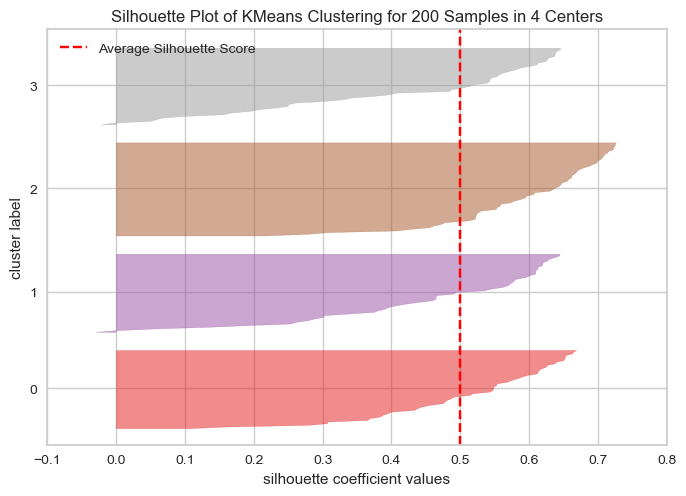

In [22]:
model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

silhouette_score = (b-a)/max(a,b)

b : the mean nearest-cluster distance 
a : the mean intra-cluster distance 

for red point, 

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29
<br></br>
<b>
Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.</b>

#### *iii. Apply K Means*

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [24]:
kmeans.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1)

In [26]:
X1

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

<b>In our clustering with Age and Spending_Score, we see that those with low spending scores are in every age group. We see that those with a spending score between 40-60 were divided into two groups and varied between the 20-40 age group and the 40-70 age group. We see that the age group with the highest spending score is between the ages of 20-40. If we look only in terms of age, we see that the spending scores are concentrated between the ages of 20-40. So the young mass is more inclined to spend money. There is no group that is older and has a high spending score. Expenditure policies can be developed for this group. We could not obtain very detailed insiders with age and spending scores.</b>

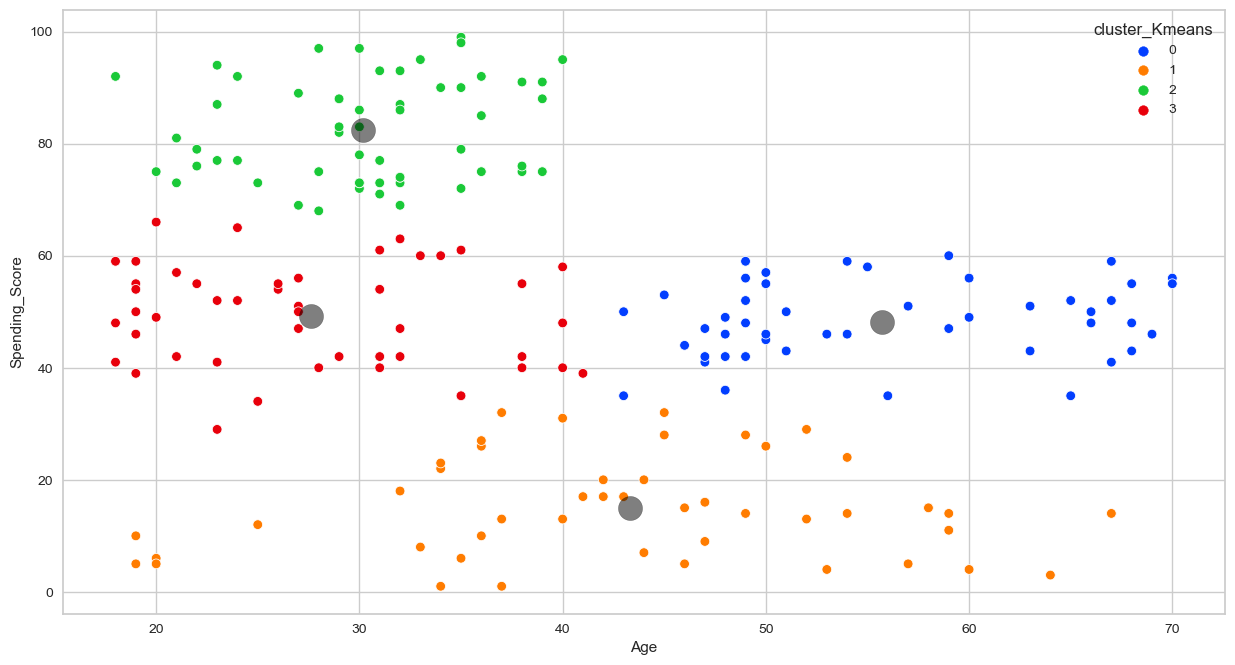

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [29]:
X2 = df.loc[:,["Annual_Income", "Spending_Score"]]

In [30]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
hopkins(X2, X2.shape[0])

0.3050615719683001

#### *ii. Determine optimal number of clusters*

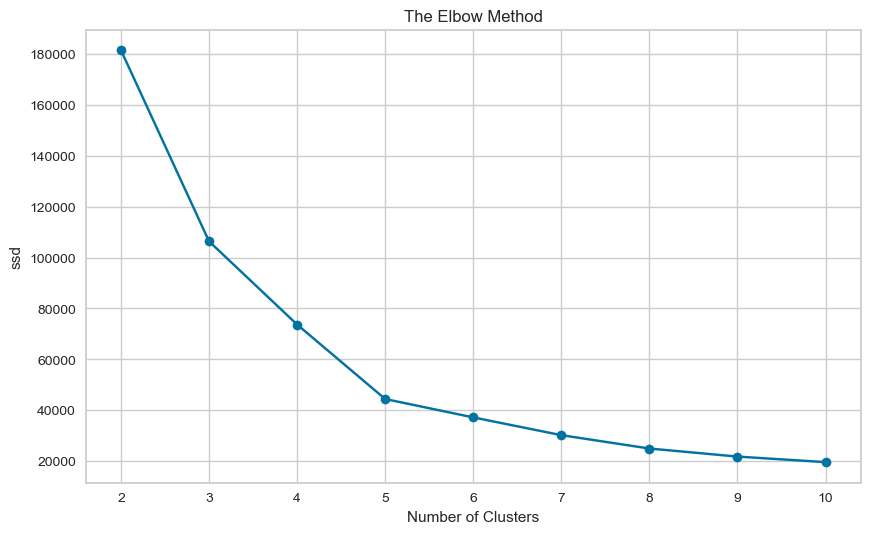

In [32]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show();

In [33]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index=lambda x:x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067
9,2178.092434


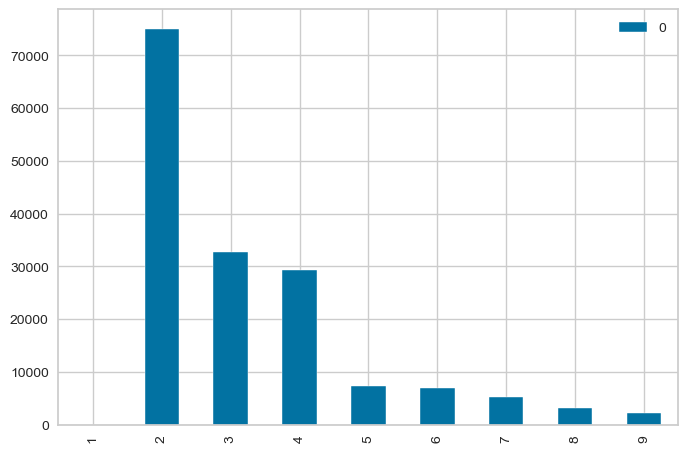

In [34]:
df_diff.plot(kind="bar");

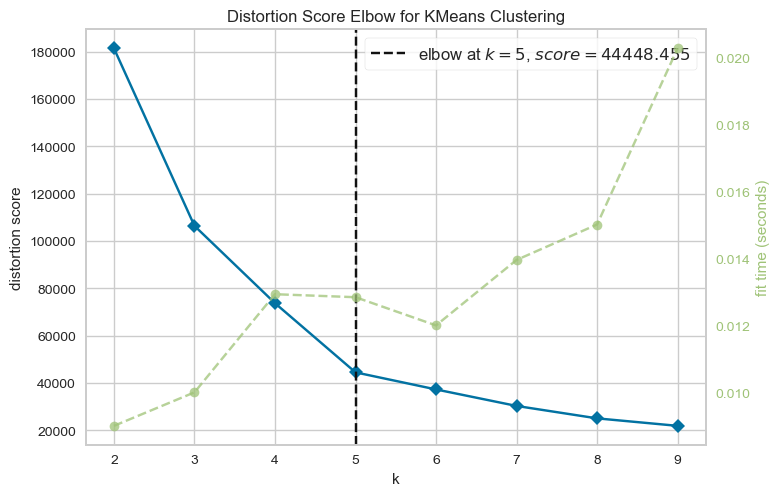

In [35]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof();

<b>According to Elbow, Yellowbrick, and Silhouette score, the point where the sharp fall stops should be chosen as n_clusters=5.</b>

In [36]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


<b>When we look at the clustering quality, we see that all clusters get approximate scores with each other. We can say that there is a little more concentration in the 0 group.</b>

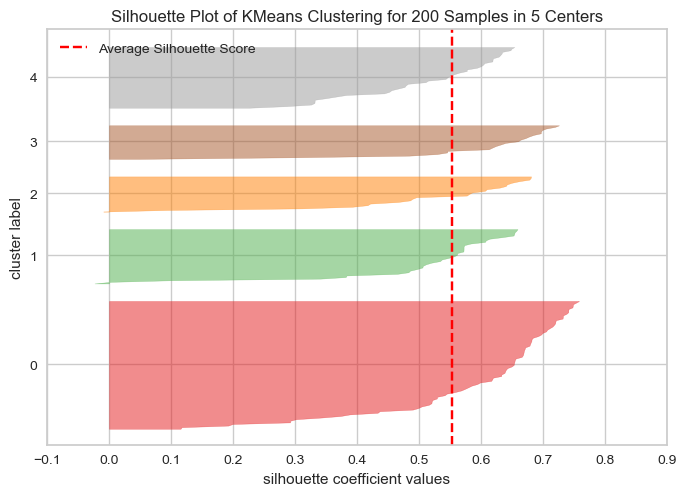

In [37]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [38]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2) 

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [39]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2) #kmeans2.labels_
X2

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

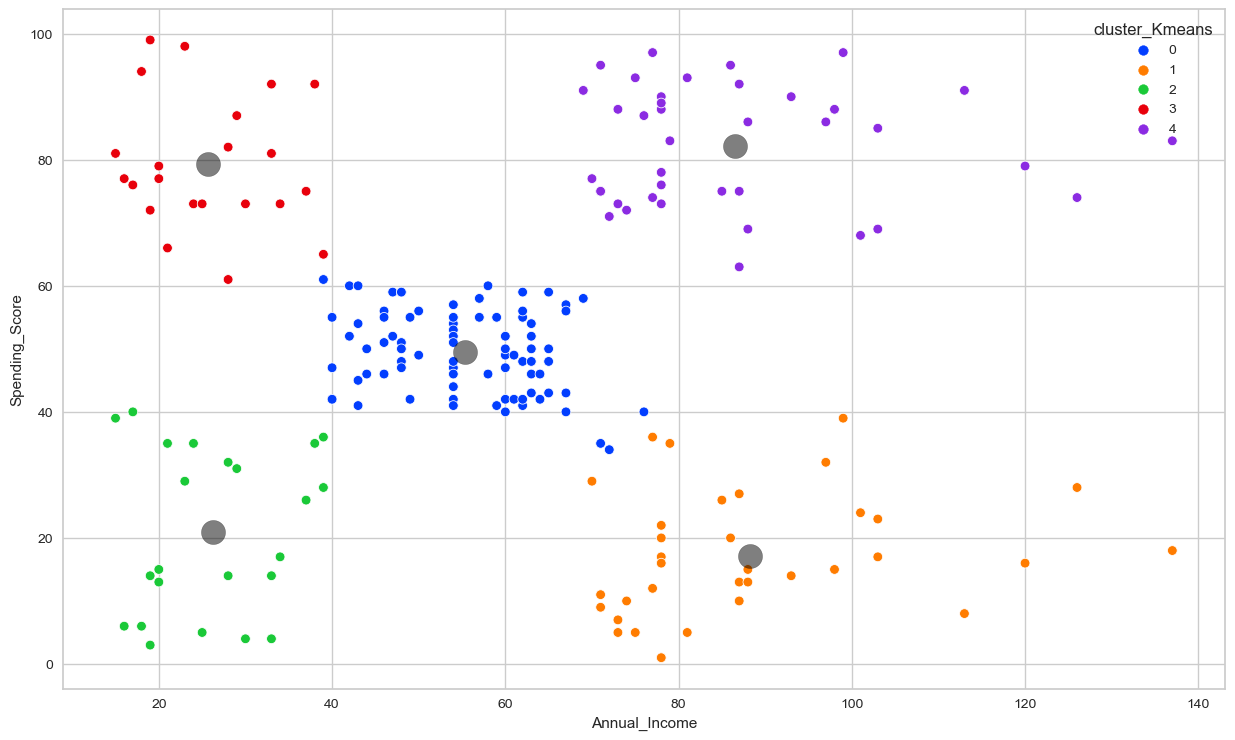

In [40]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=X2, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [41]:
from scipy.cluster.hierarchy import linkage

In [43]:
from scipy.cluster.hierarchy import dendrogram

<b>We will make a tree with a dendrogram and decide how many clusters will be selected by looking at the distance between the clusters.</b>

In [42]:
hc_ward = linkage(y = X1, method = "ward")    # Varyansa gore atama islemi
hc_complete = linkage(X1, "complete")         # En uzak noktaya gore atama islemi
hc_average = linkage(X1, "average")           # Ortalamaya gore atama islemi
hc_single = linkage(X1, "single") 

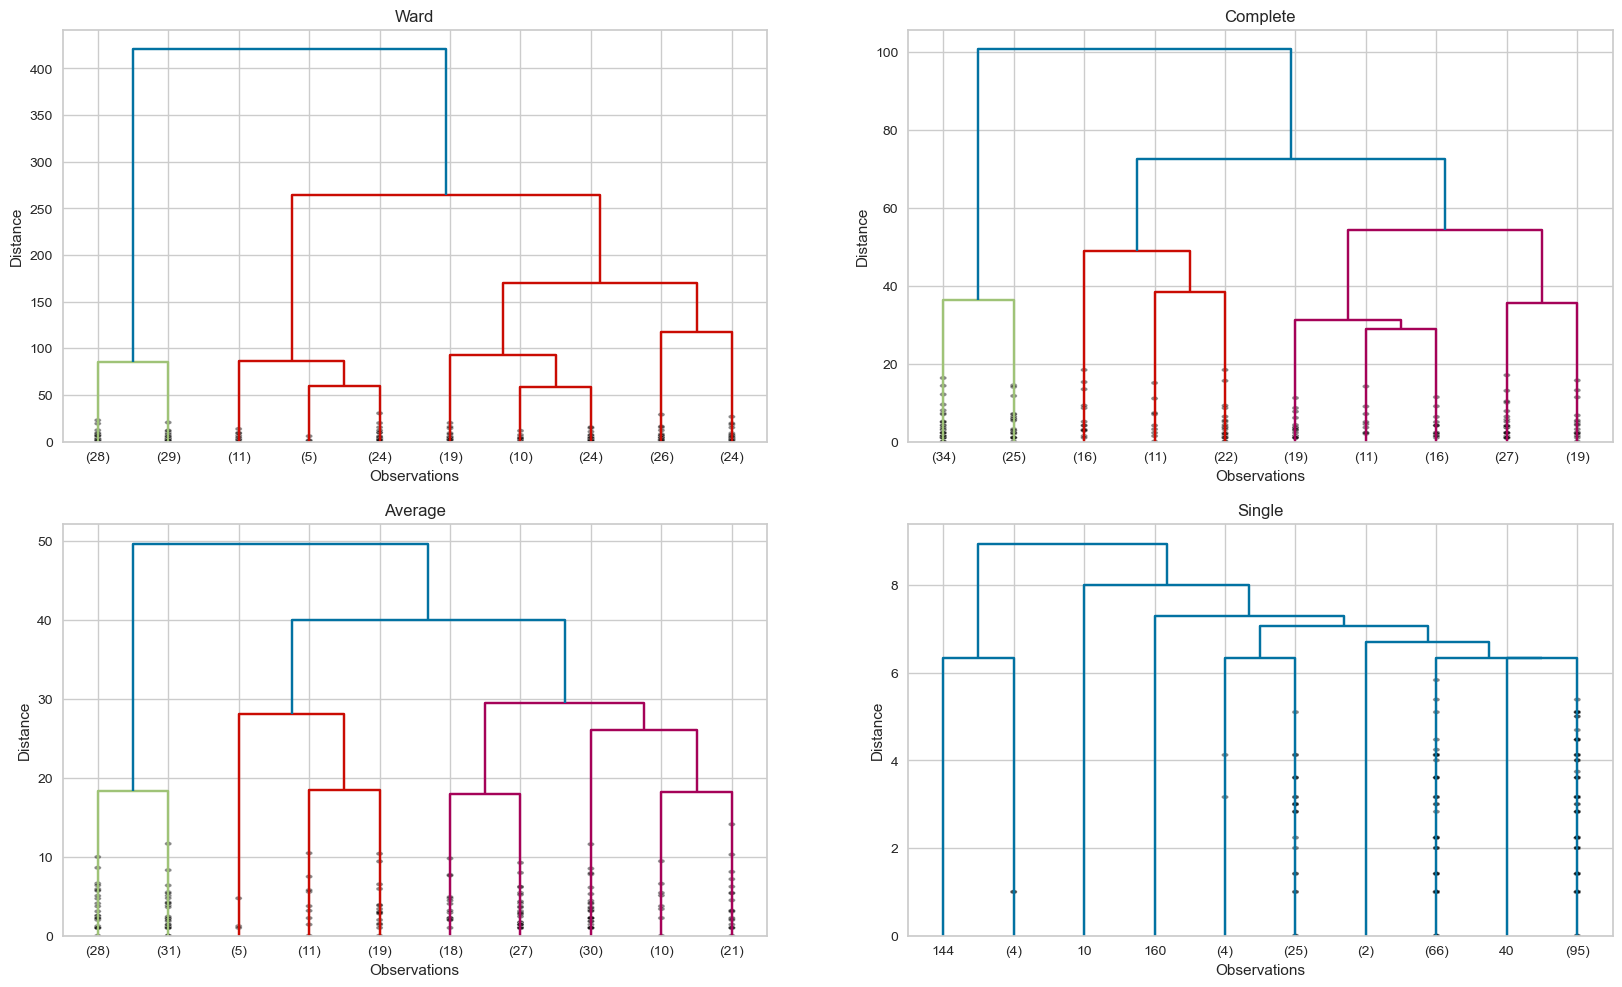

In [44]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

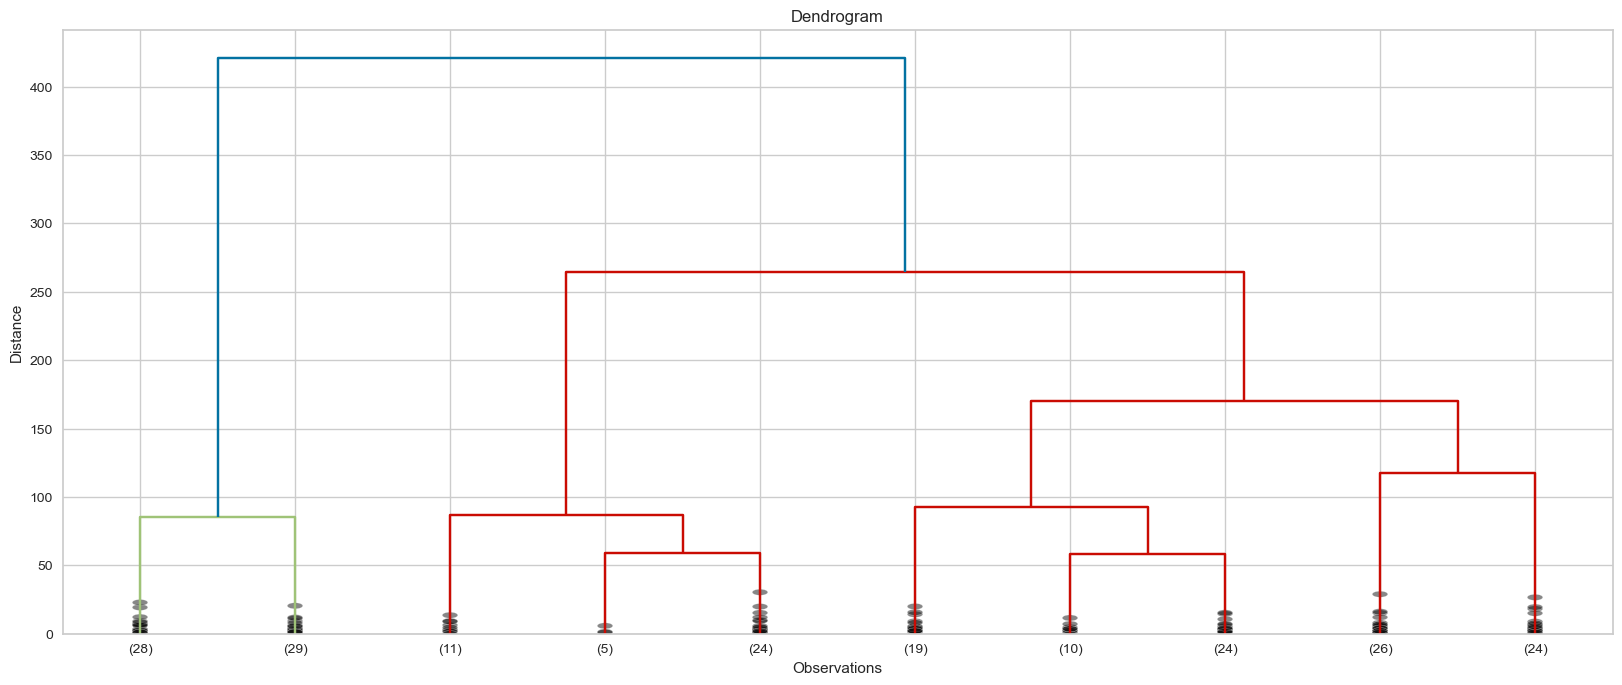

In [45]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


## Clustering based on Annual Income and Spending Score- x2

In [48]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

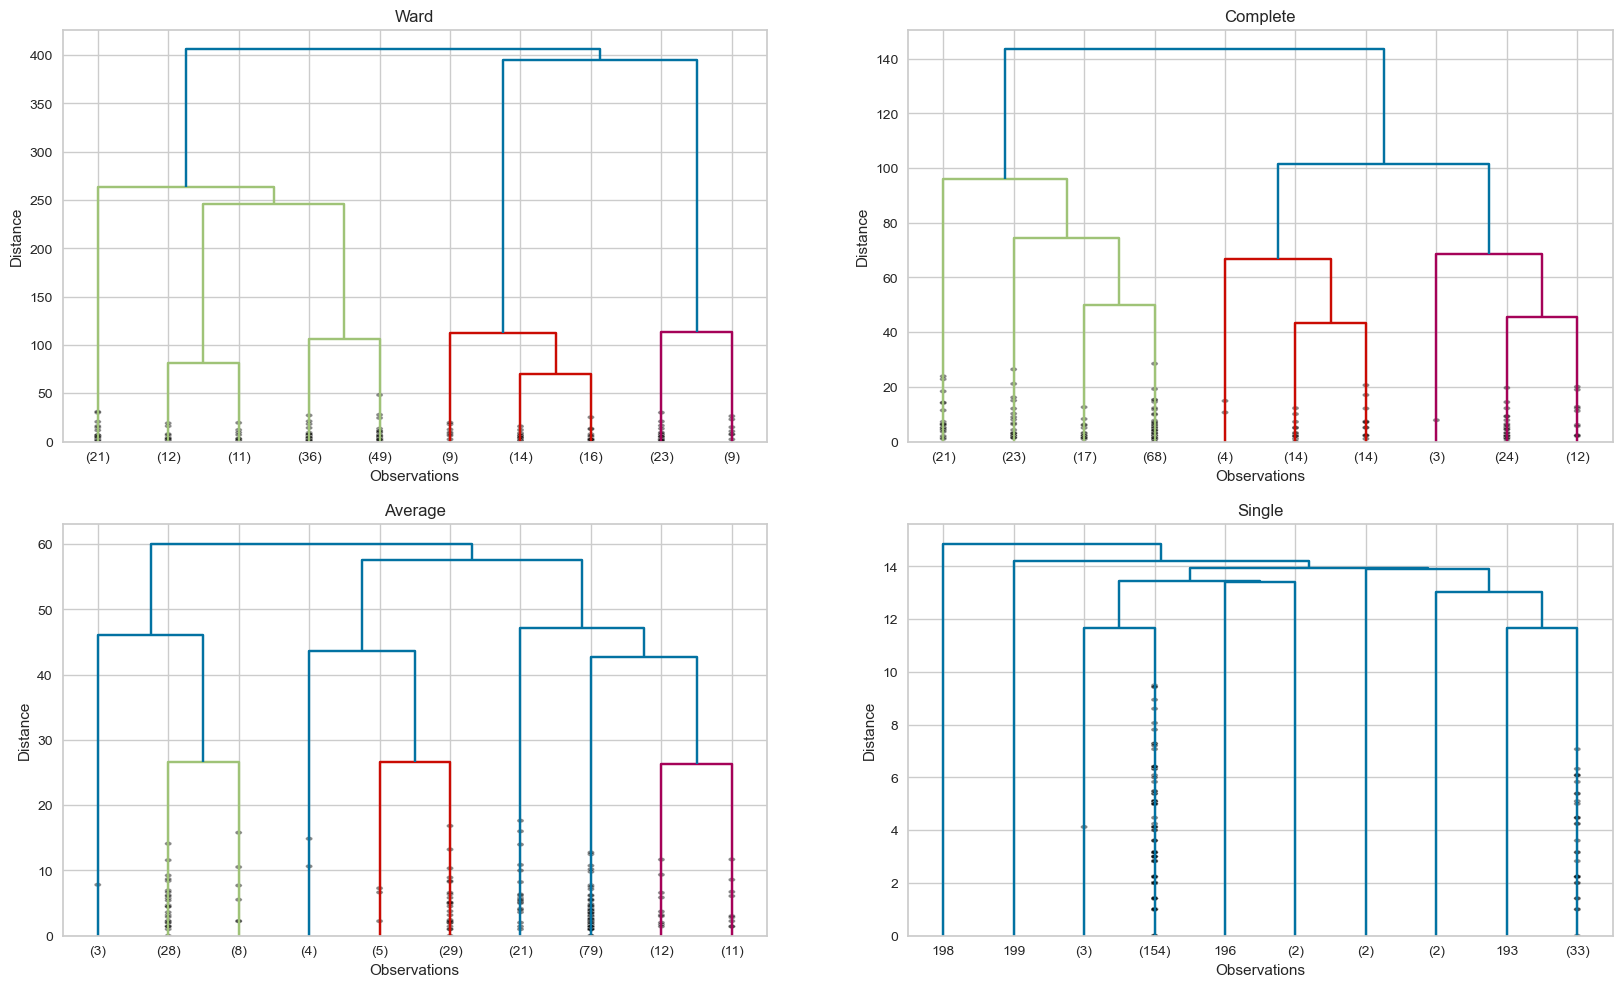

In [49]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

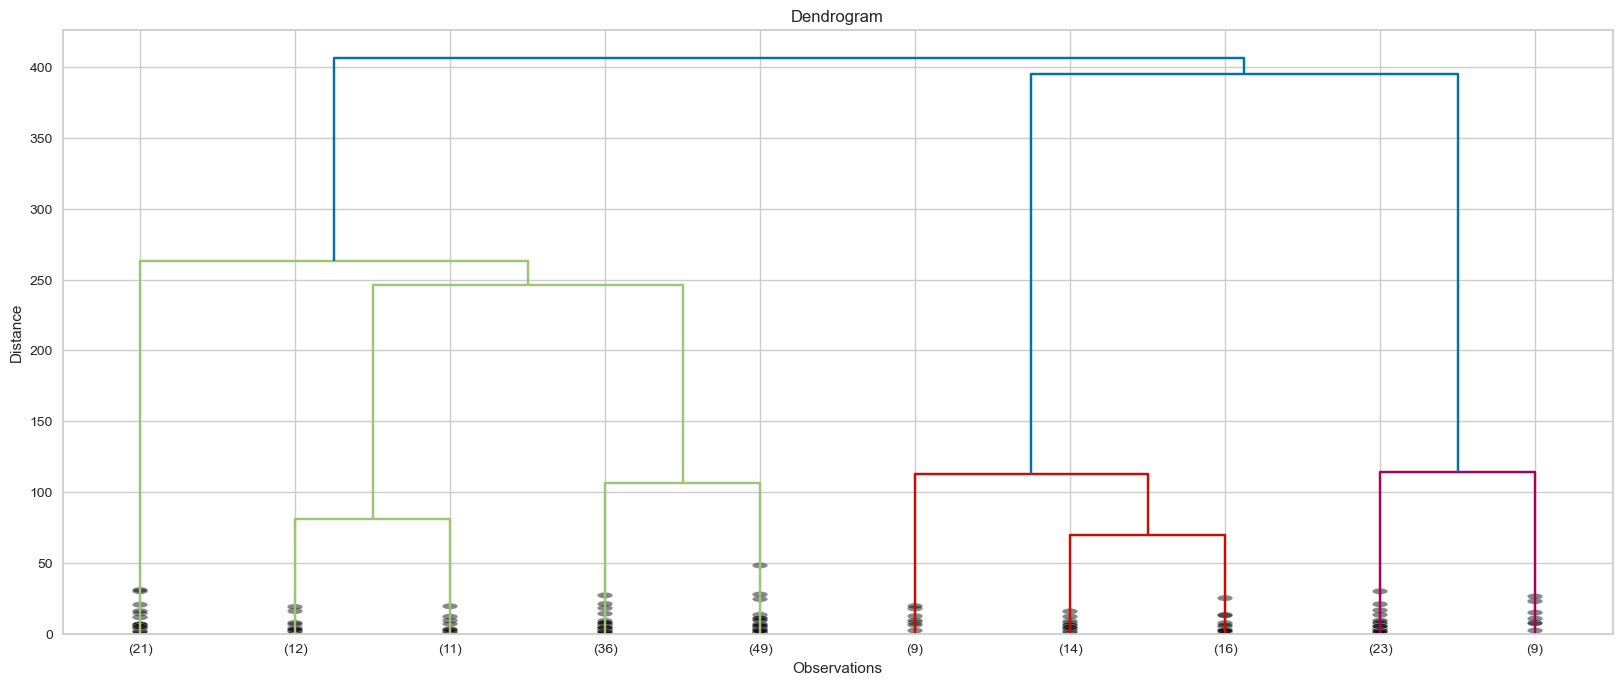

In [50]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [51]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [52]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

In [53]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [54]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

In [55]:
X2['cluster_Agg'] = y_agg2
X2.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

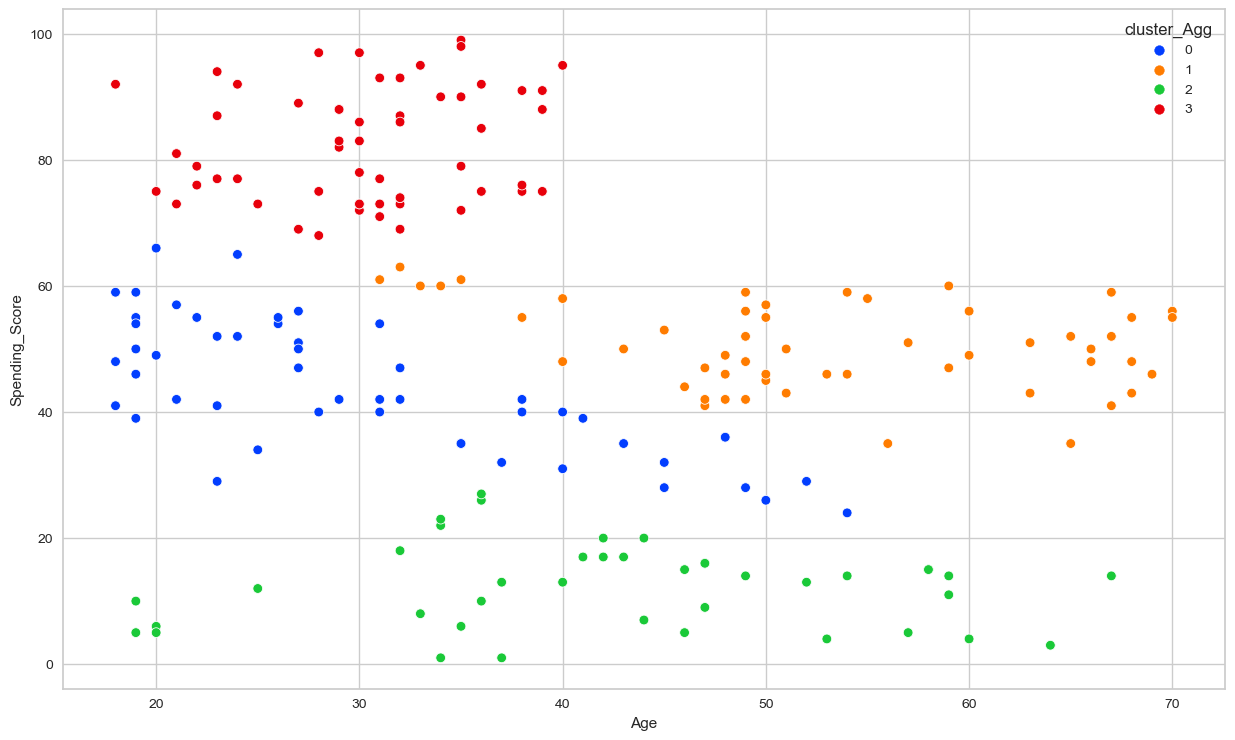

In [56]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X1, palette="bright");

<b>We compared the results we obtained from K-means and Agglomerative. We played with the colors in the palette to give the same colors to the same domes. It is seen that there is a slightly better clustering in K-means, Agglomerative could not distinguish the blue and green groups very well. Therefore, we will choose the k-means algorithm for X1.</b>

Text(0.5, 1.0, 'Agg')

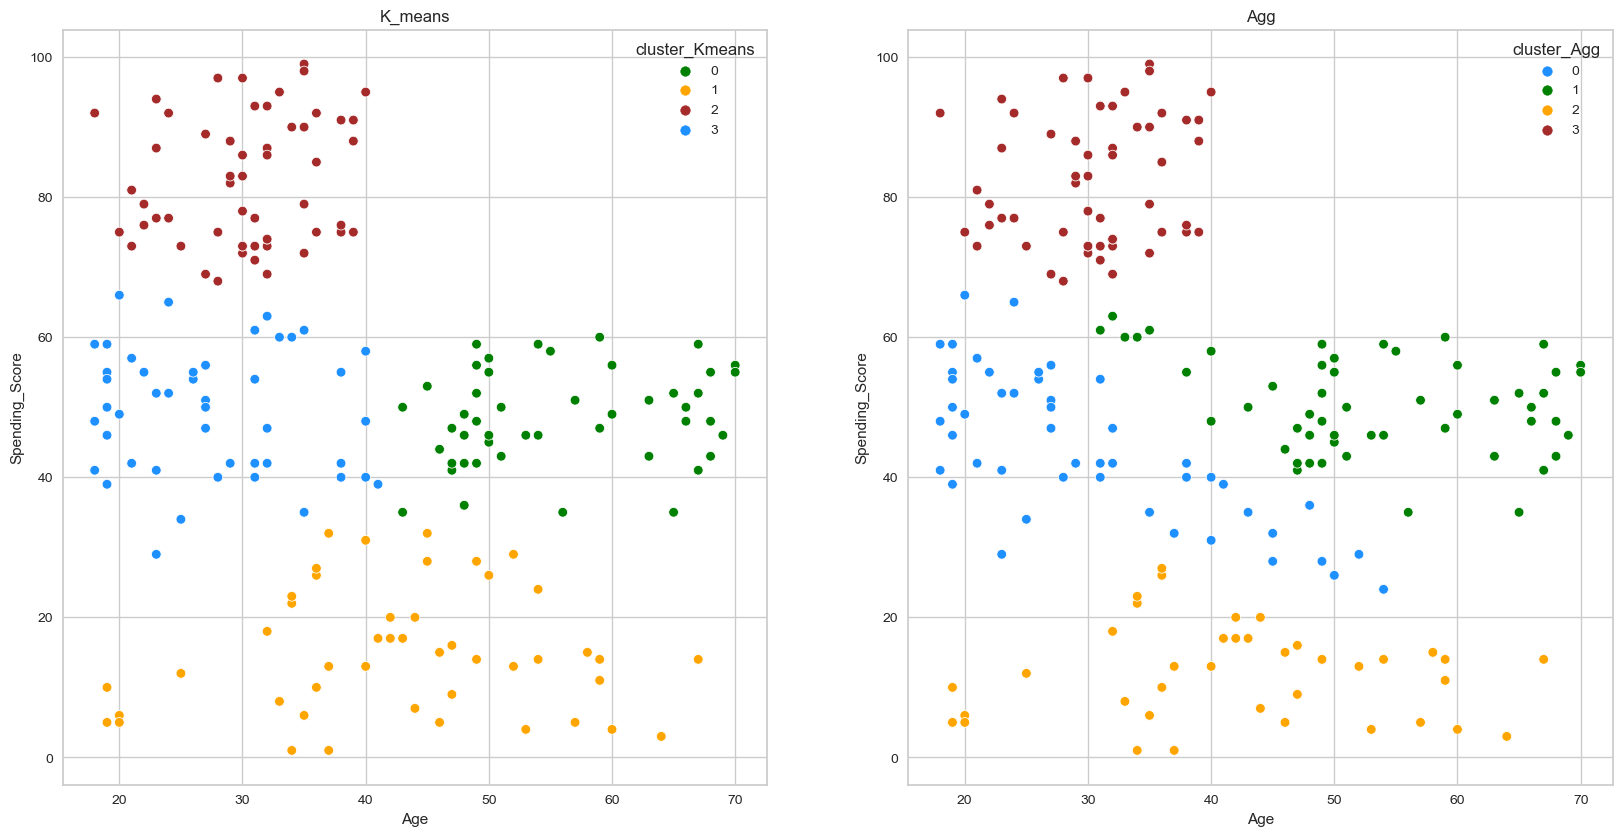

In [57]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X1, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- x2

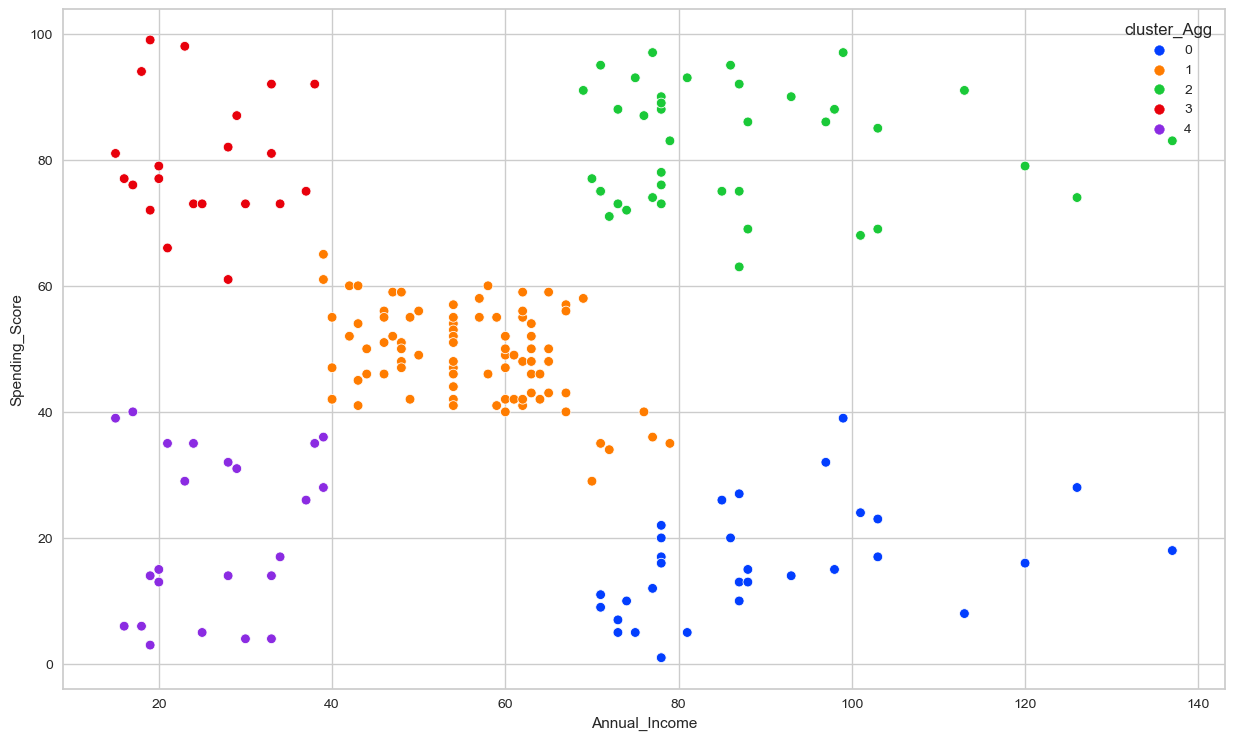

In [58]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X2 ,palette="bright");

Text(0.5, 1.0, 'Agg')

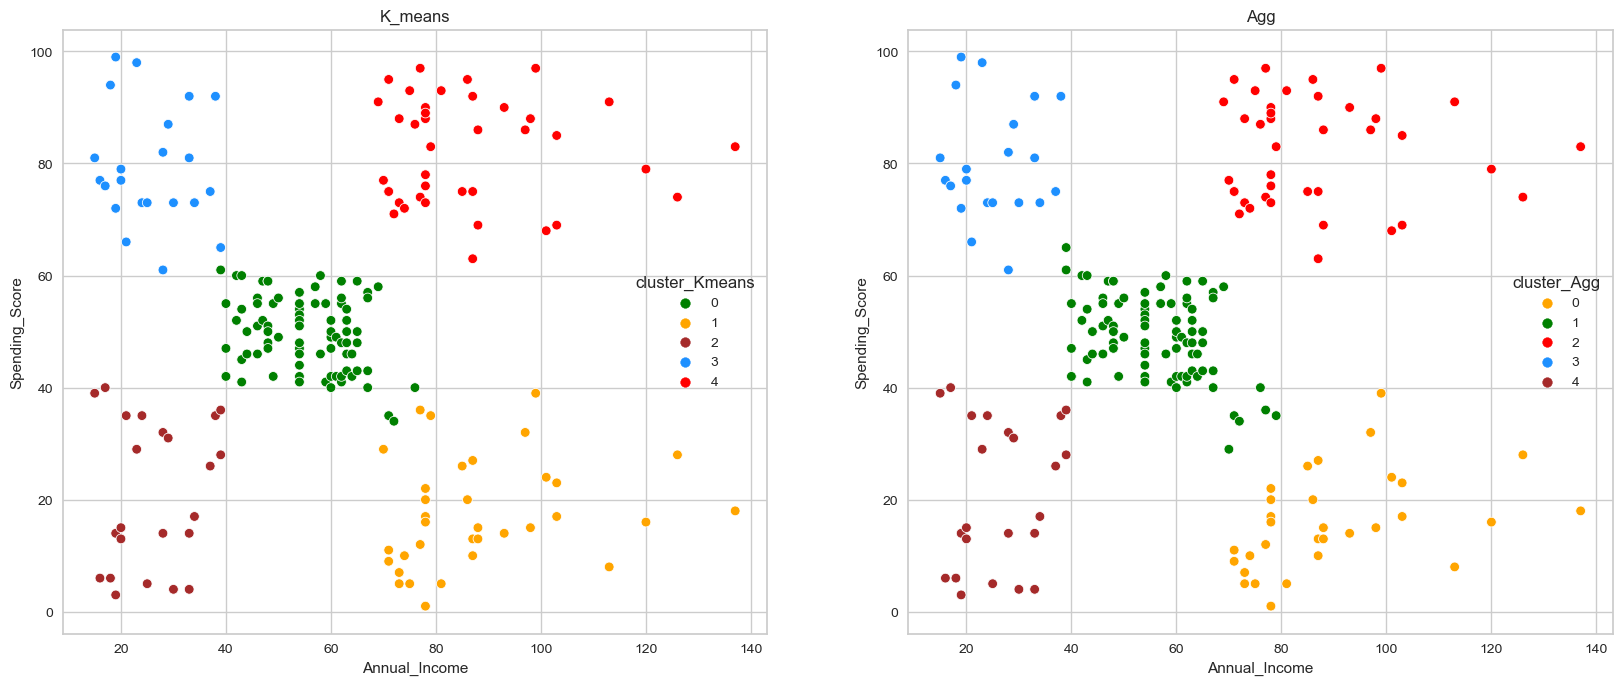

In [59]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [60]:
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


In [61]:
X1.cluster_Kmeans.value_counts()

2    57
1    48
0    48
3    47
Name: cluster_Kmeans, dtype: int64

<b>We decided to use the values of K Means. We see that there is a balanced distribution in clustering.</b>

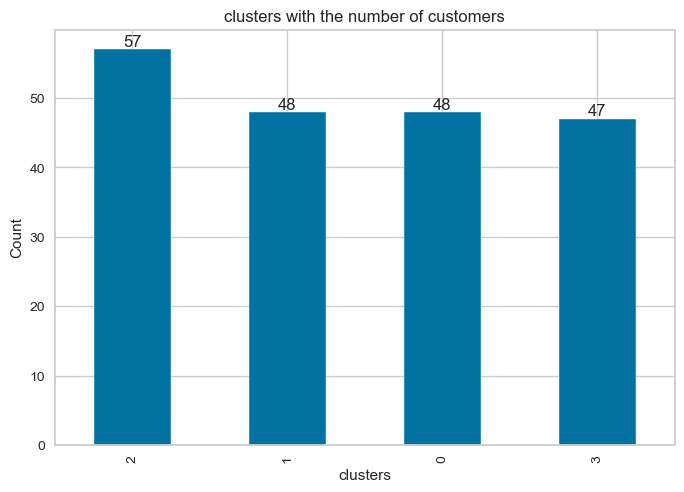

In [62]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [63]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [64]:
df["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


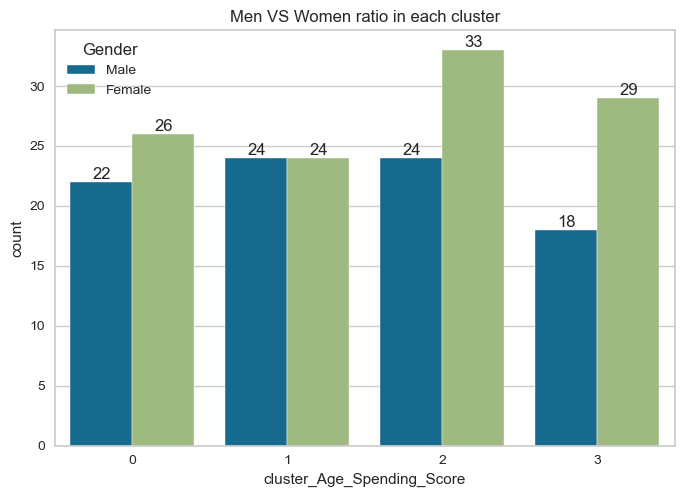

In [65]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

<b>We made a grouping on the clusters we made and got the average age scores, annual income, and spensing scores for each cluster.</b>

In [66]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


<b>Group 0 consisted of the over 50 age group, group 1 consisted of the middle age group, and groups 2 and 3 consisted of a slightly younger population. When we look at the annual income, we see that a clear distinction cannot be made. The data with the density were generally collected in the same place. In spending scores, the blue and pink group may actually be the same group because their values are very close to each other.</b>

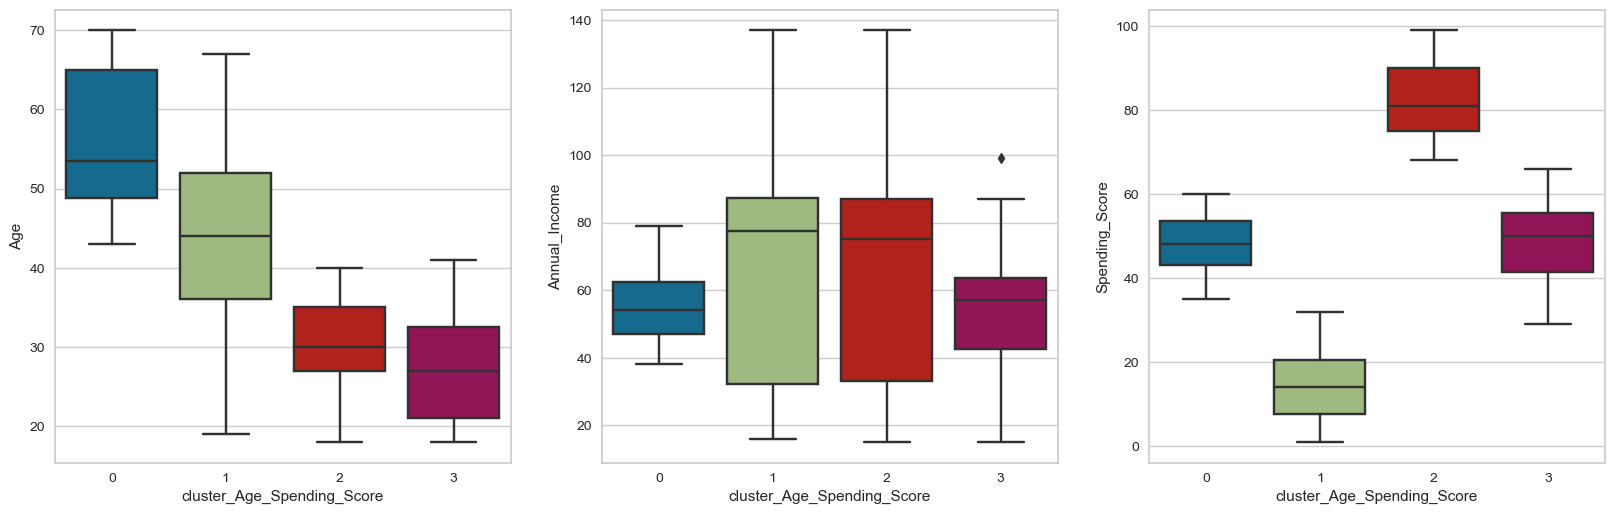

In [67]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df);

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df);

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

<b>Cluster 0:</b> Average age is 56, annual income is approx. 55k, spending scores approx. 48

<b>Cluster 1:</b> High annual incomes but very low spending scores. Among these 4 clusters, the first thing to do is to increase the spending scores of this group with a high income.

<b>Cluster 2:</b> Young people with high incomes and high expenditures. The store needs to maintain this customer base.

<b>Cluster 3:</b> Average age is 28, average annual income is 53, average spending score is 49
<br></br>
<b>The annual income and spending scores of clusters 0 and 3 are the same. Only the average age of spending differs. In this case, the only thing that separated the two groups was age.</b>

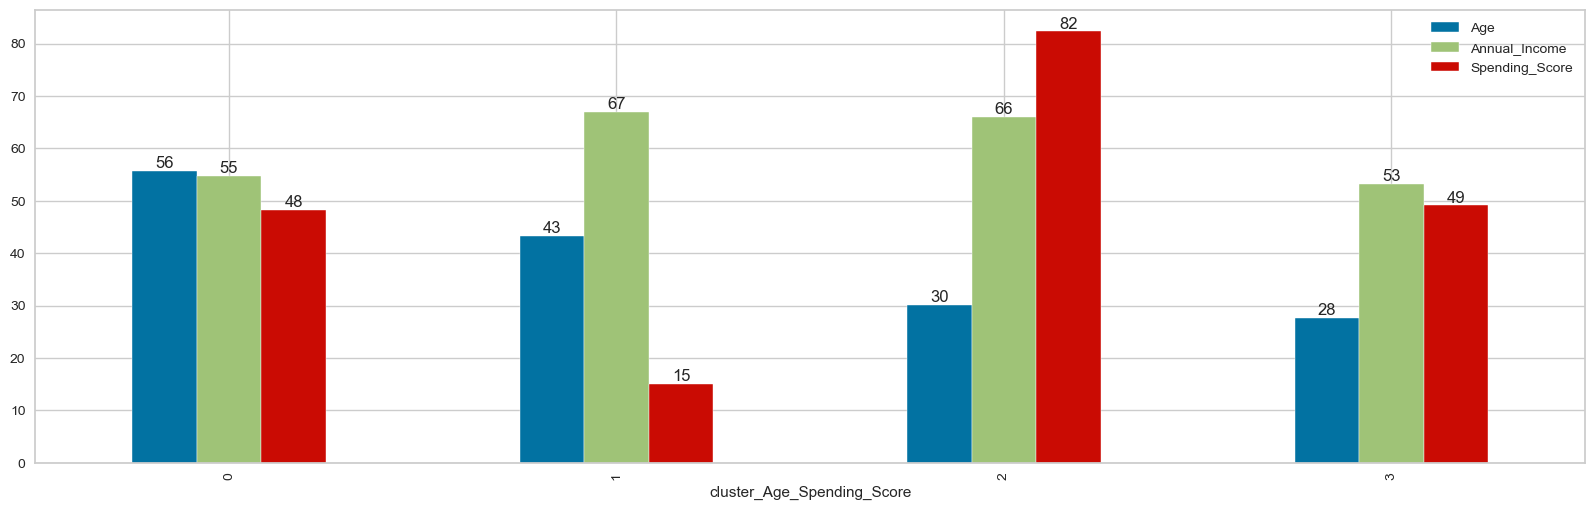

In [68]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [69]:
X2

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [70]:
X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

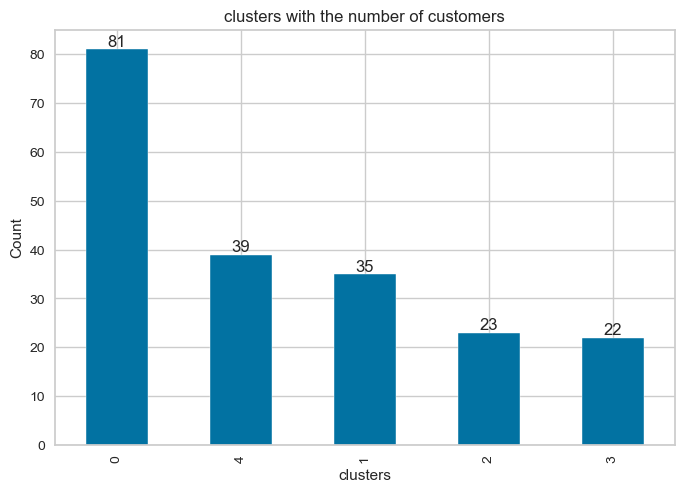

In [71]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [72]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [73]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [75]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans

In [76]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


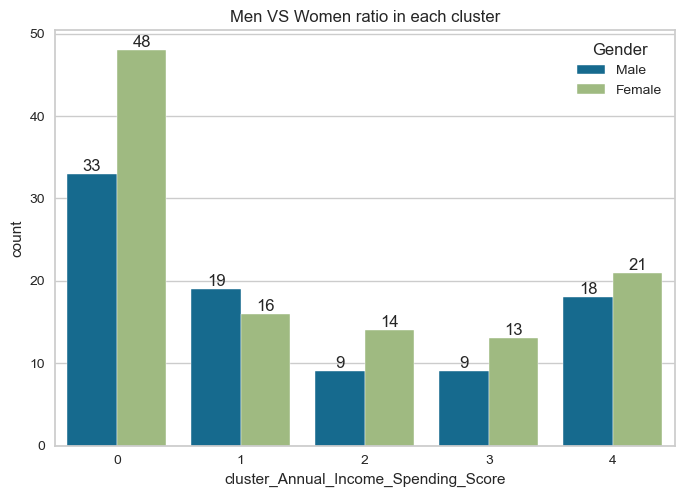

In [77]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [78]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<b>Female 0:</b> Middle age group with high annual income. It can be tempted to spend more.

<b>Female 1:</b> Those who have a very high annual income but do not spend. They should be motivated to spend. (Group with the most potential)

<b>Female 2:</b> Low income, low spending.

<b>Female 3:</b> The group with low income and high spending.

<b>We see that there are similar groups for the male group as well. But we can say that women spend more than men.</b>

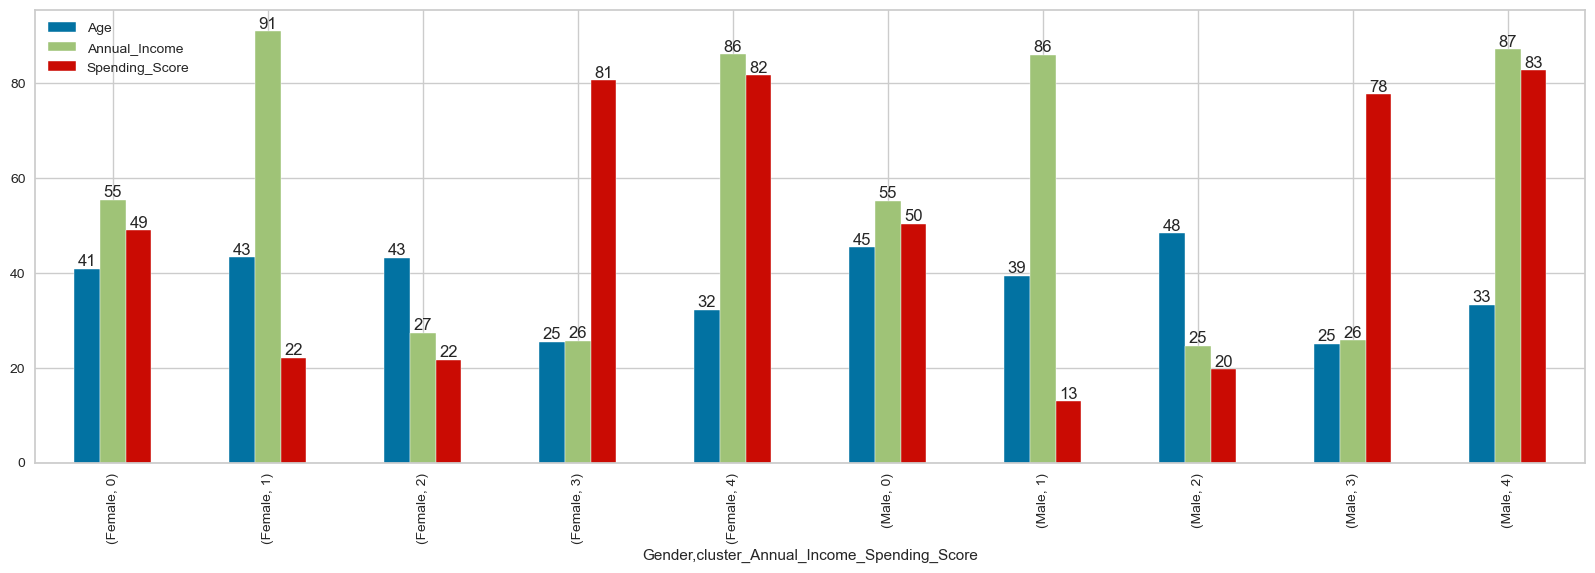

In [79]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

<b>Group 0:</b> Age range is wide, annual income is average, spending scores are average.

<b>Cluster 1:</b> Age range is middle age, annual income is high, spending scores are very low.

<b>Cluster 2:</b> Age range is middle-aged and above, annual income is low, expenditure scores are low.

<b>Group 3:</b> The age range is low, their annual income is low, and their spending scores are very high.

<b>Group 4:</b> The age range is average and slightly below, their annual income is high, and their expenditure scores are high.

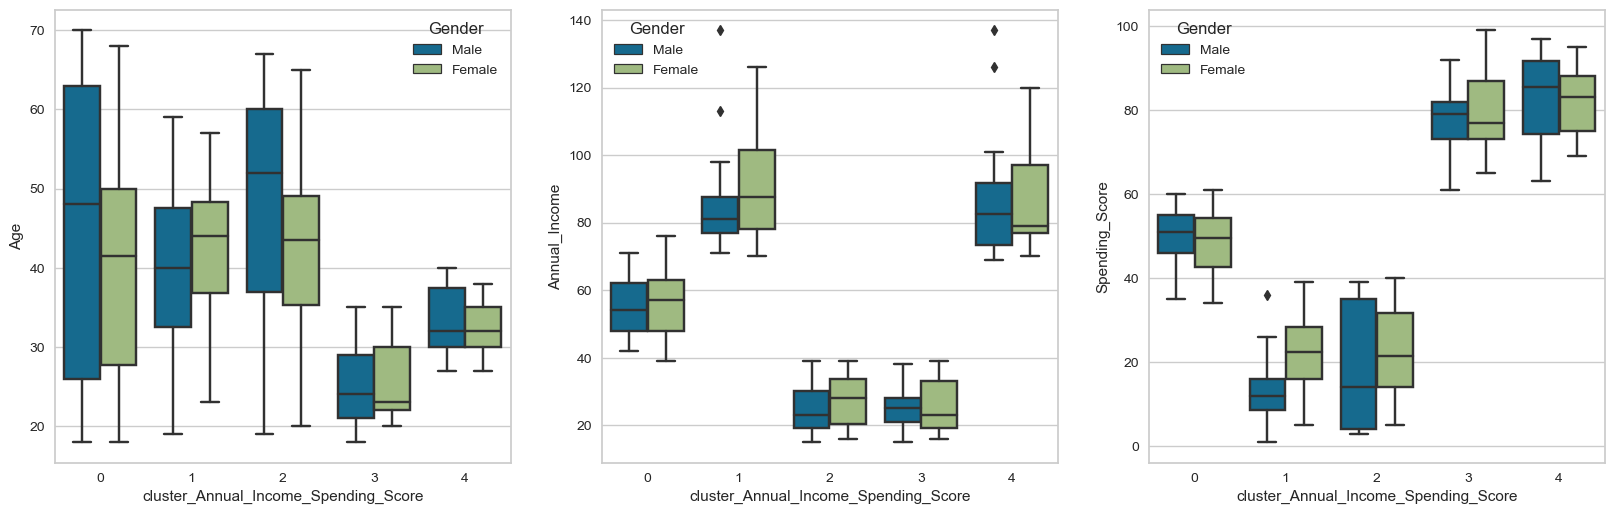

In [82]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

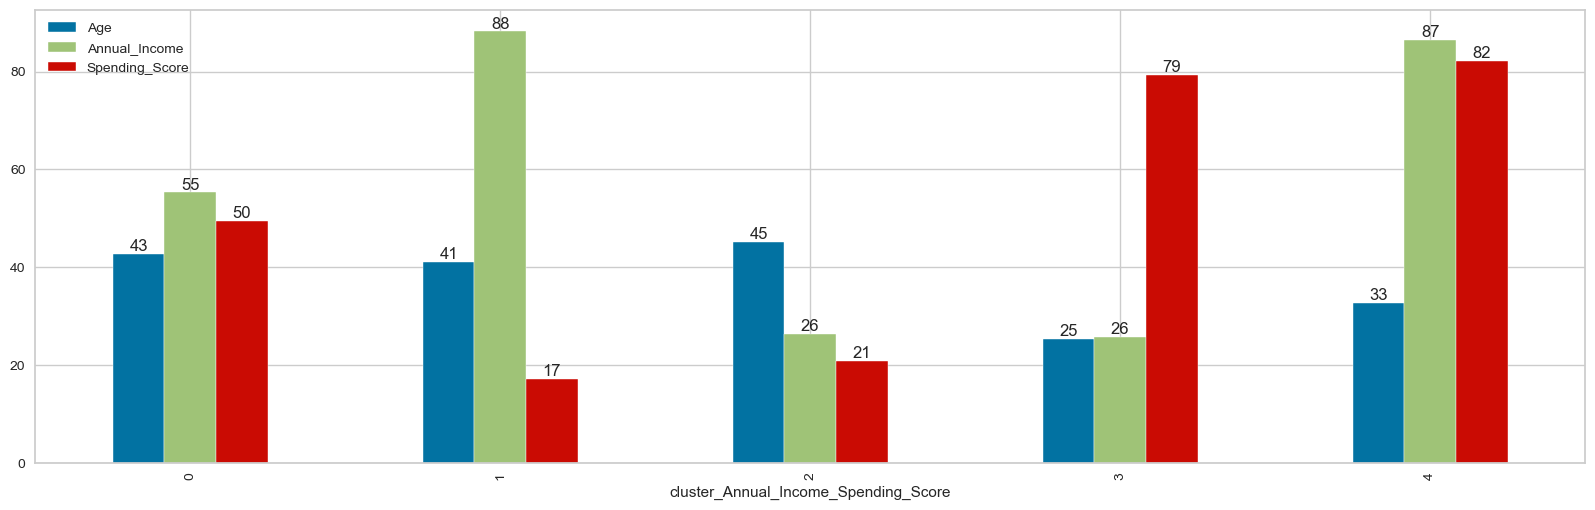

In [83]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___